이번 장에서는 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 자세히 알아본다.

# 3.1 퍼셉트론에서 신경망으로

이전에 배운 퍼셉트론에서 **편향까지 입력으로 간주하여, 입력 신호의 총합을 출력 신호로 변환하는 함수**를 '활성화 함수'라고 한다.<br>

# 3.2 활성화 함수

In [1]:
# 계단 함수
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

In [2]:
import numpy as np
x=np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [3]:
y=x>0
y

array([False,  True,  True])

In [4]:
y=y.astype(int)
y

array([0, 1, 1])

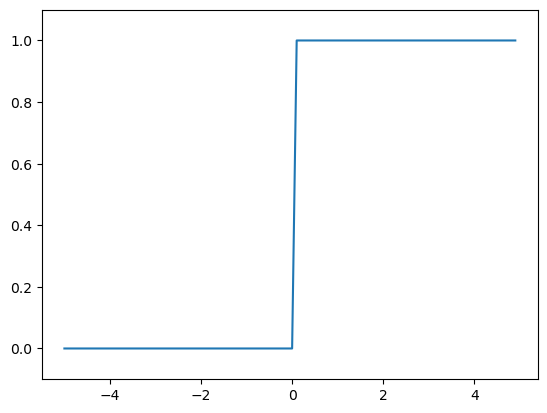

In [5]:
# 계단 함수의 그래프
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x>0, dtype=int)

x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수

In [6]:
# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [7]:
t = np.array([1.0, 2.0, 3.0])
1.0+t

array([2., 3., 4.])

In [8]:
1.0/t

array([1.        , 0.5       , 0.33333333])

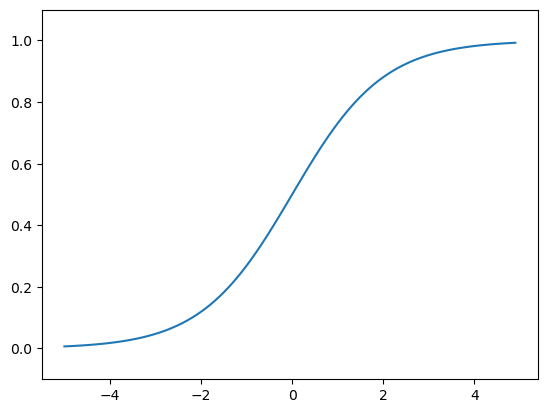

In [9]:
# 시그모이드 함수 그래프
x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x) # sigmoid(X)함수로 변경
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

계단 함수는 출력이 0 or 1인 반면, **시그모이드 함수는 출력이 매끄러운, 연속적인 값**이 된다.<br>
이것이 신경망 학습에서 중요한 역할

### ReLU 함수
Rectified Linear Unit <br>
입력이 0 이하면 0, 이상이면 입력 그대로 출력하는 함수

In [10]:
# ReLU 함수
def ReLU(x):
    return np.maximum(0, x) # 두 입력 중, 큰 값을 출력하는 maximum()

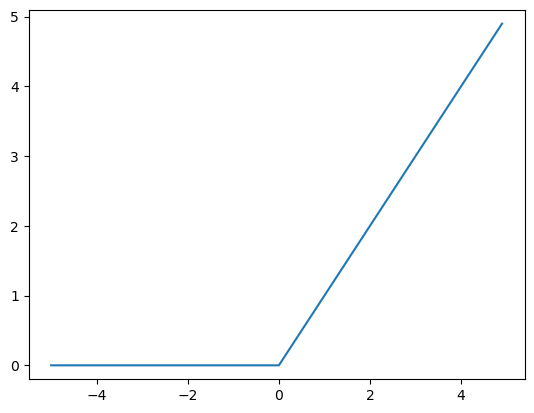

In [11]:
x=np.arange(-5.0, 5.0, 0.1)
y=ReLU(x)
plt.plot(x, y)
plt.ylim(-0.2, 5.1)
plt.show()

# 3.3 다차원 배열의 계산

In [12]:
A=np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [13]:
np.ndim(A)

1

In [14]:
A.shape

(4,)

In [15]:
B=np.array([[1,2],[3,4], [5,6]])
np.ndim(B)

2

In [16]:
B.shape

(3, 2)

In [17]:
A=np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [18]:
B=np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [19]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [20]:
A=np.array([[1,2,3],[4,5,6]])
B=np.array([[1,2],[3,4],[5,6]])
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [21]:
C=np.array([[1,2], [3,4]])
# np.dot(A, C) # 행렬의 shape에 주의할 것! A의 열 수 = C의 행 수 를 만족해야 한다.

In [22]:
A=np.array([[1,2],[3,4],[5,6]])
print(A.shape)
B=np.array([7,8])
print(B.shape)
print(np.dot(A,B))

(3, 2)
(2,)
[23 53 83]


In [23]:
np.dot(A, B).shape

(3,)

In [24]:
X=np.array([1,2])
W=np.array([[1,3,5],[2,4,6]])
Y=np.dot(X,W)
print(Y)

# 1x2 와 2x3의 행렬곱 = 1x3

[ 5 11 17]


# 3.4 3층 신경망 구현하기

In [25]:
X = np.array([1.0, 0.5]) # 입력
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 가중치
B1 = np.array([0.1, 0.2, 0.3]) # 편향

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1)+B1

(2, 3)
(2,)
(3,)


In [26]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [27]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [28]:
def identity_function(x): # 특별한 기능은 없지만, 흐름 상 정의함. 출력층의 활성화 함수는 구분하여 시그마로 표시한다.
    return x

W3=np.array([[0.1,0.3],[0.2,0.4]])
B3=np.array([0.1,0.2])

A3=np.dot(Z2,W3)+B3
Y=identity_function(A3)

In [29]:
def init_network():
    network={}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
